# Einleitung

* Hallo
* World

In [1]:
import pandas as pd
git_blame = pd.read_csv("../dataset/linux_blame_log.csv")
git_blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [2]:
git_blame.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 971.8 MB


In [3]:
git_blame.path = pd.Categorical(git_blame.path)
git_blame.author = pd.Categorical(git_blame.author)
git_blame.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         category
author       category
timestamp    int64
line         int64
dtypes: category(2), int64(2)
memory usage: 109.9 MB


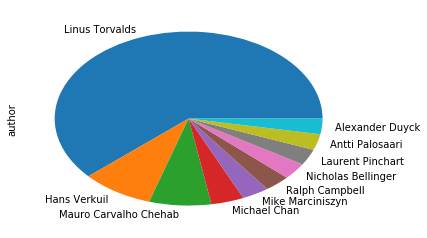

In [4]:
%matplotlib inline
git_blame.author.value_counts().head(10).plot.pie()

## Wissensträger

In [5]:
git_blame.timestamp = pd.to_datetime(git_blame.timestamp)

In [6]:
a_year_ago = pd.Timestamp("today") - pd.DateOffset(years=1)
a_year_ago

Timestamp('2017-06-22 09:28:08.055008')

In [7]:
git_blame['knowing'] = git_blame.timestamp >= a_year_ago
git_blame.head()

,path,author,timestamp,line,knowing
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,False
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,False
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,False
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,False
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,False


In [8]:
knowledge_carrier = git_blame[git_blame.knowing]
knowledge_carrier.head()

,path,author,timestamp,line,knowing
316,drivers/scsi/bfa/bfad_drv.h,Kees Cook,2017-10-16 21:43:17,317,True
736,drivers/scsi/bfa/bfad_im.c,Hannes Reinecke,2017-08-25 11:57:03,376,True
739,drivers/scsi/bfa/bfad_im.c,Hannes Reinecke,2017-08-25 11:57:03,379,True
742,drivers/scsi/bfa/bfad_im.c,Hannes Reinecke,2017-08-25 11:57:03,382,True
748,drivers/scsi/bfa/bfad_im.c,Hannes Reinecke,2017-08-25 11:57:03,388,True


In [9]:
(knowledge_carrier.author.value_counts() / len(knowledge_carrier)).head(10)

Anirudh Venkataramanan    0.043831
Daniel Scheller           0.038372
Yasunari Takiguchi        0.030070
Aviad Krawczyk            0.029249
Salil                     0.024831
Todor Tomov               0.019678
Tomer Tayar               0.015064
Jakub Kicinski            0.013224
Wei Hu(Xavier)            0.012788
Linus Walleij             0.012599
Name: author, dtype: float64

## Wissenslücken im Code

In [10]:
git_blame.path.value_counts().head()

drivers/media/dvb-frontends/drx39xyj/drxj_map.h    15055
drivers/isdn/hardware/eicon/message.c              14954
drivers/net/ethernet/sfc/mcdi_pcol.h               14534
drivers/net/ethernet/intel/i40e/i40e_main.c        14484
drivers/staging/rdma/hfi1/chip.c                   13914
Name: path, dtype: int64

In [11]:
git_blame['component'] = git_blame.path.str.split("/").str[:2].str.join(":")
git_blame.head()

,path,author,timestamp,line,knowing,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,False,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,False,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,False,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,False,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,False,drivers:scsi


In [12]:
git_blame.component.value_counts();

In [13]:
knowledge_per_component = git_blame.groupby('component')[['knowing']].mean()
knowledge_per_component.head()

,knowing
component,
arch:arc,0.000000
arch:arm,0.000588
arch:i386,0.000000
arch:ia64,0.000000
arch:mips,0.000000


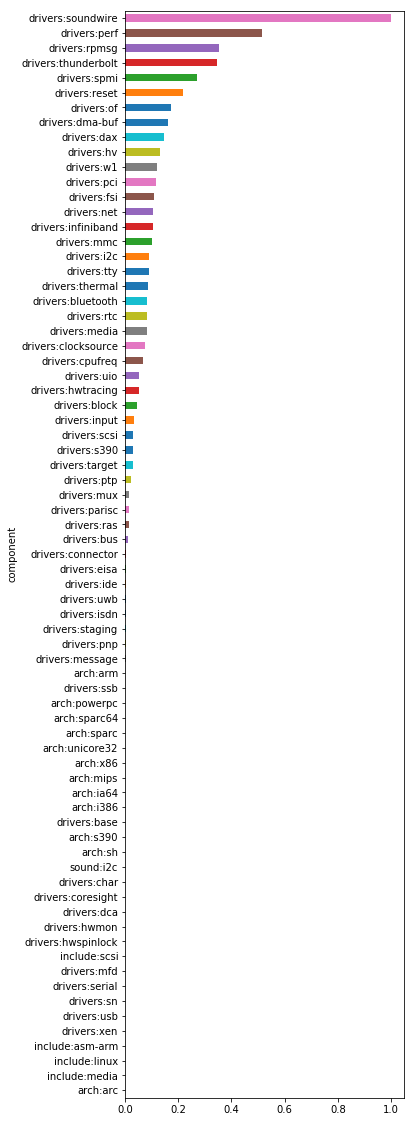

In [14]:
knowledge_per_component.knowing.sort_values().plot.barh(figsize=[5,20])